In [174]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pylab as plt
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PolyCollection

# This requires the basemap package, but I can see if there is a way to have other dependencies
# https://anaconda.org/anaconda/basemap

In [181]:
def plotDeterminant3D(A):
    # See; https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    
    # Will only execute if it is 3x3
    if (np.shape(A) != (3,3)):
        print('Le matrice A doit être 3x3.')
        return
    
    # Define vertices for a cube to multiply with input matrix A to get parallelopiped
    cube = np.array([[-1, -1, -1],
                  [1, -1, -1 ],
                  [1, 1, -1],
                  [-1, 1, -1],
                  [-1, -1, 1],
                  [1, -1, 1 ],
                  [1, 1, 1],
                  [-1, 1, 1]])
    vertices = np.zeros((8,3))
    for i in range(8):
        vertices[i,:] = np.dot(cube[i,:], A)
    
    
    # Create figure / grid to plot
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection = '3d')
    
    r = [-1,1]
    X, Y = np.meshgrid(r,r)
    
    # Plot vertices
    ax.scatter3D(vertices[:,0], vertices[:,1], vertices[:,2])
    
    # List of sides
    sides = [[vertices[0], vertices[1], vertices[2], vertices[3]],
             [vertices[4], vertices[5], vertices[6], vertices[7]],
             [vertices[0], vertices[1], vertices[5], vertices[4]],
             [vertices[2], vertices[3], vertices[7], vertices[6]],
             [vertices[1], vertices[2], vertices[6], vertices[5]],
             [vertices[4], vertices[7], vertices[3], vertices[0]]]
    
    # Plot sides
    ax.add_collection3d(Poly3DCollection(sides, facecolors='cyan', linewidths =1, edgecolors = 'black', alpha=.25))
    plt.show
    
    vol = np.abs(np.linalg.det(A))
    vol = np.round(vol, decimals = 3) 
    print('Le volume est:', vol)
    

Le volume est: 9.0


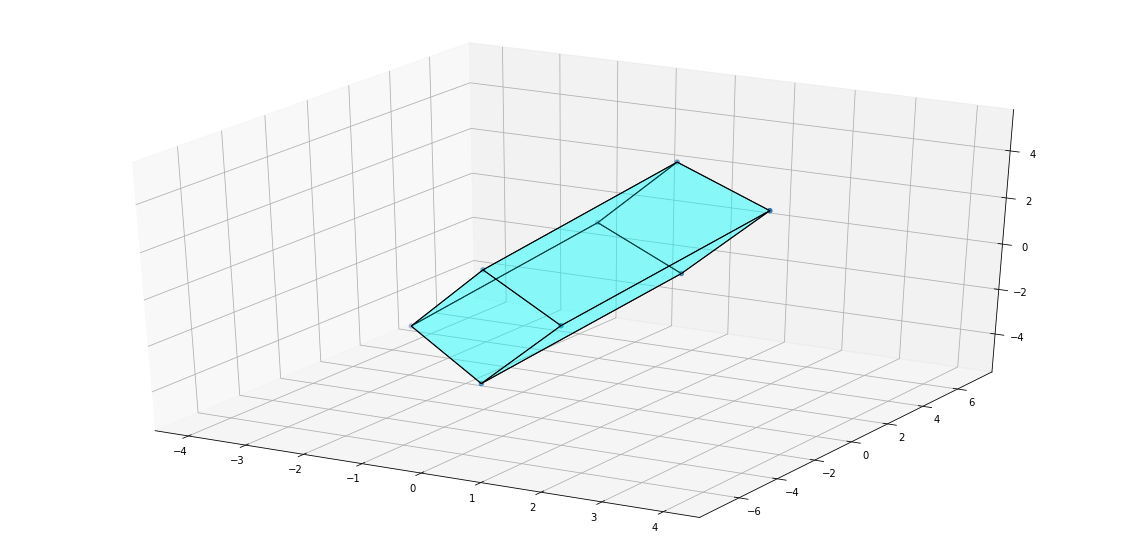

In [182]:
A = [[2, -4, 1],
    [1, -1, 2],
    [1, 2, 2]]

plotDeterminant3D(A)

In [204]:
def plotDeterminant2D(A):
    # See; https://stackoverflow.com/questions/44881885/python-draw-parallelepiped
    
    # Will only execute if it is 2x2
    if (np.shape(A) != (2,2)):
        print('Le matrice A doit être 2x2.')
        return
    
    # Define vertices for a cube to multiply with input matrix A to get parallelopiped
    rect = np.array([[1, -1],
                     [1, 1],
                     [-1, 1],
                     [-1, -1]])
    
    vertices = np.zeros((5,2))
    
    for i in range(4): vertices[i,:] = np.dot(rect[i,:], A)
    vertices[4,0] = vertices[0,0]
    vertices[4,1] = vertices[0,1]
    
    
    # Create figure / grid to plot
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111)
    

    
    # Plot vertices
    ax.plot(vertices[:,0], vertices[:,1])
    
   
    # Plot sides
    #ax.add_collection3d(Poly3DCollection(sides, facecolors='cyan', linewidths =1, edgecolors = 'black', alpha=.25))
    plt.grid()
    plt.show
    
    vol = np.abs(np.linalg.det(A)) # absolute value of the determinant
    vol = np.round(vol, decimals = 3)
    print("L'aire est:", vol)
    
    
    
    fig, ax = plt.subplots()
    coll = PolyCollection([vertices])
    ax.add_collection(coll)
    ax.autoscale_view()
    plt.grid()
    plt.show()

L'aire est: 12.943


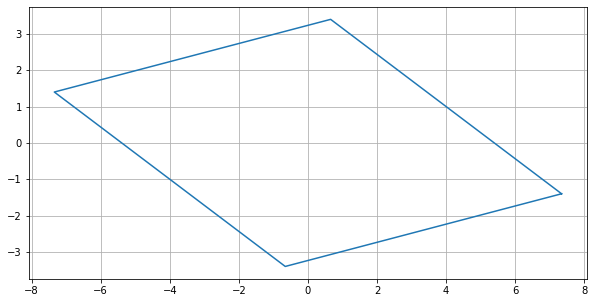

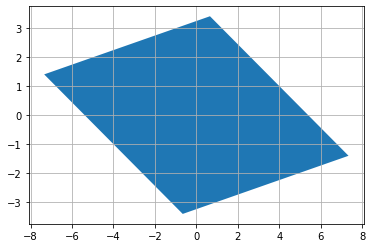

In [205]:
A = [[4,1], [-3.343,2.4]]

plotDeterminant2D(A)